### Assesment Data Analysis

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Read CSV

In [2]:
btc_data = pd.read_csv("EOD_BTC_data.csv")
btc_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,EOD_Return
0,2018-01-01,"14,112.20","14,112.20","13,154.70","13,657.20","10,291,200,000","229,119,155,396",-0.03526
1,2018-01-02,"13,625.00","15,444.60","13,163.60","14,982.10","16,846,600,192","251,377,913,955",0.09701
2,2018-01-03,"14,978.20","15,572.80","14,844.50","15,201.00","16,871,900,160","255,080,562,912",0.01461
3,2018-01-04,"15,270.70","15,739.70","14,522.20","15,599.20","21,783,199,744","261,795,321,110",0.02620
4,2018-01-05,"15,477.20","17,705.20","15,202.80","17,429.50","23,840,899,072","292,544,135,538",0.11733


In [3]:
usdt_data = pd.read_csv("Tether_Q1_2018.csv")
usdt_data.head()

,block_time,sending_address,reference_address,tx_type,amount,fee
0,2018-01-01 00:08:28,1FoWyxwPXuj4C6abqwhjDWdz6D4PZgYRjA,1MKkEwc9un9cjmf6UtvBUY9AcXjbMbBFYz,Simple Send,4173.270,0.002564
1,2018-01-01 00:08:28,1FoWyxwPXuj4C6abqwhjDWdz6D4PZgYRjA,13vuKP7VAUA8B2JVvaL8LrtkNVdiHyj9p1,Simple Send,14741.800,0.002564
2,2018-01-01 00:08:28,1FoWyxwPXuj4C6abqwhjDWdz6D4PZgYRjA,1FTARzz6sfDKYiwPzqxboJqh4YXWK61DzR,Simple Send,4216.160,0.002564
3,2018-01-01 00:08:28,1FoWyxwPXuj4C6abqwhjDWdz6D4PZgYRjA,1Pa797fyTHrvPqdk3VrnBFubEoGrQJccbT,Simple Send,39975.000,0.002564
4,2018-01-01 00:08:28,1FoWyxwPXuj4C6abqwhjDWdz6D4PZgYRjA,1QAXVrYfJgxocU2sR2S7H9gS1N43T94uTr,Simple Send,564.183,0.002564


##### Converting date colume from object to date

In [4]:
usdt_data['block_time'] = pd.to_datetime(usdt_data["block_time"]).dt.date
btc_data['Date'] = pd.to_datetime(btc_data["Date"]).dt.date

##### Grouping the USDT dataset from minutes based data to daily based data

In [5]:
series = usdt_data.groupby(['block_time'])['amount'].sum()

In [6]:
usd_volume = pd.DataFrame(series).reset_index()
usd_volume

,block_time,amount
0,2018-01-01,1.285066e+08
1,2018-01-02,2.603533e+08
2,2018-01-03,3.427062e+08
3,2018-01-04,5.941749e+08
4,2018-01-05,2.575938e+08
...,...,...
85,2018-03-27,3.465130e+08
86,2018-03-28,3.165248e+08
87,2018-03-29,2.747149e+08
88,2018-03-30,4.617583e+08


In [7]:
btc_price = btc_data[['Date', 'Close', "Volume"]]

In [8]:
usd_volume['block_time'] = pd.to_datetime(usd_volume["block_time"]).dt.date
btc_price['Date'] = pd.to_datetime(btc_price["Date"]).dt.date

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9548\158906579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_price['Date'] = pd.to_datetime(btc_price["Date"]).dt.date


In [9]:
usd_volume["Date"] = usd_volume["block_time"]
usd_volume

,block_time,amount,Date
0,2018-01-01,1.285066e+08,2018-01-01
1,2018-01-02,2.603533e+08,2018-01-02
2,2018-01-03,3.427062e+08,2018-01-03
3,2018-01-04,5.941749e+08,2018-01-04
4,2018-01-05,2.575938e+08,2018-01-05
...,...,...,...
85,2018-03-27,3.465130e+08,2018-03-27
86,2018-03-28,3.165248e+08,2018-03-28
87,2018-03-29,2.747149e+08,2018-03-29
88,2018-03-30,4.617583e+08,2018-03-30


##### Merging the USDT and the BTC datase

In [10]:
df = pd.merge(btc_price, usd_volume, on = "Date", how = "inner")
df

,Date,Close,Volume,block_time,amount
0,2018-01-01,"13,657.20","10,291,200,000",2018-01-01,1.285066e+08
1,2018-01-02,"14,982.10","16,846,600,192",2018-01-02,2.603533e+08
2,2018-01-03,"15,201.00","16,871,900,160",2018-01-03,3.427062e+08
3,2018-01-04,"15,599.20","21,783,199,744",2018-01-04,5.941749e+08
4,2018-01-05,"17,429.50","23,840,899,072",2018-01-05,2.575938e+08
...,...,...,...,...,...
85,2018-03-27,"7,833.04","5,378,250,240",2018-03-27,3.465130e+08
86,2018-03-28,"7,954.48","4,935,289,856",2018-03-28,3.165248e+08
87,2018-03-29,"7,165.70","6,361,229,824",2018-03-29,2.747149e+08
88,2018-03-30,"6,890.52","6,289,509,888",2018-03-30,4.617583e+08


In [11]:
single_table = df[["Date", "Close", "amount","Volume"]]
single_table

,Date,Close,amount,Volume
0,2018-01-01,"13,657.20",1.285066e+08,"10,291,200,000"
1,2018-01-02,"14,982.10",2.603533e+08,"16,846,600,192"
2,2018-01-03,"15,201.00",3.427062e+08,"16,871,900,160"
3,2018-01-04,"15,599.20",5.941749e+08,"21,783,199,744"
4,2018-01-05,"17,429.50",2.575938e+08,"23,840,899,072"
...,...,...,...,...
85,2018-03-27,"7,833.04",3.465130e+08,"5,378,250,240"
86,2018-03-28,"7,954.48",3.165248e+08,"4,935,289,856"
87,2018-03-29,"7,165.70",2.747149e+08,"6,361,229,824"
88,2018-03-30,"6,890.52",4.617583e+08,"6,289,509,888"


In [12]:
single_table = single_table.replace(r',','', regex=True) 

In [13]:
single_table['Close'] = single_table['Close'].astype(float)
single_table['Volume'] = single_table['Volume'].astype(float)

##### Reading the required dataset to CSV

In [14]:
single_table.to_csv("Bitcoin_prise_and_daily_USDT_Volum.csv")

In [15]:
single_table

,Date,Close,amount,Volume
0,2018-01-01,13657.20,1.285066e+08,1.029120e+10
1,2018-01-02,14982.10,2.603533e+08,1.684660e+10
2,2018-01-03,15201.00,3.427062e+08,1.687190e+10
3,2018-01-04,15599.20,5.941749e+08,2.178320e+10
4,2018-01-05,17429.50,2.575938e+08,2.384090e+10
...,...,...,...,...
85,2018-03-27,7833.04,3.465130e+08,5.378250e+09
86,2018-03-28,7954.48,3.165248e+08,4.935290e+09
87,2018-03-29,7165.70,2.747149e+08,6.361230e+09
88,2018-03-30,6890.52,4.617583e+08,6.289510e+09


In [16]:
single_table["Date"] = single_table["Date"].astype("datetime64")
df2 = single_table
single_table = single_table.set_index("Date")
single_table

,Close,amount,Volume
Date,,,
2018-01-01,13657.20,1.285066e+08,1.029120e+10
2018-01-02,14982.10,2.603533e+08,1.684660e+10
2018-01-03,15201.00,3.427062e+08,1.687190e+10
2018-01-04,15599.20,5.941749e+08,2.178320e+10
2018-01-05,17429.50,2.575938e+08,2.384090e+10
...,...,...,...
2018-03-27,7833.04,3.465130e+08,5.378250e+09
2018-03-28,7954.48,3.165248e+08,4.935290e+09
2018-03-29,7165.70,2.747149e+08,6.361230e+09


In [17]:
single_table["Close"].sort_values()

Date
2018-03-30     6890.52
2018-02-05     6955.27
2018-03-31     6973.53
2018-03-29     7165.70
2018-02-07     7621.30
                ...   
2018-01-03    15201.00
2018-01-04    15599.20
2018-01-07    16477.60
2018-01-05    17429.50
2018-01-06    17527.00
Name: Close, Length: 90, dtype: float64

##### Showing Plots

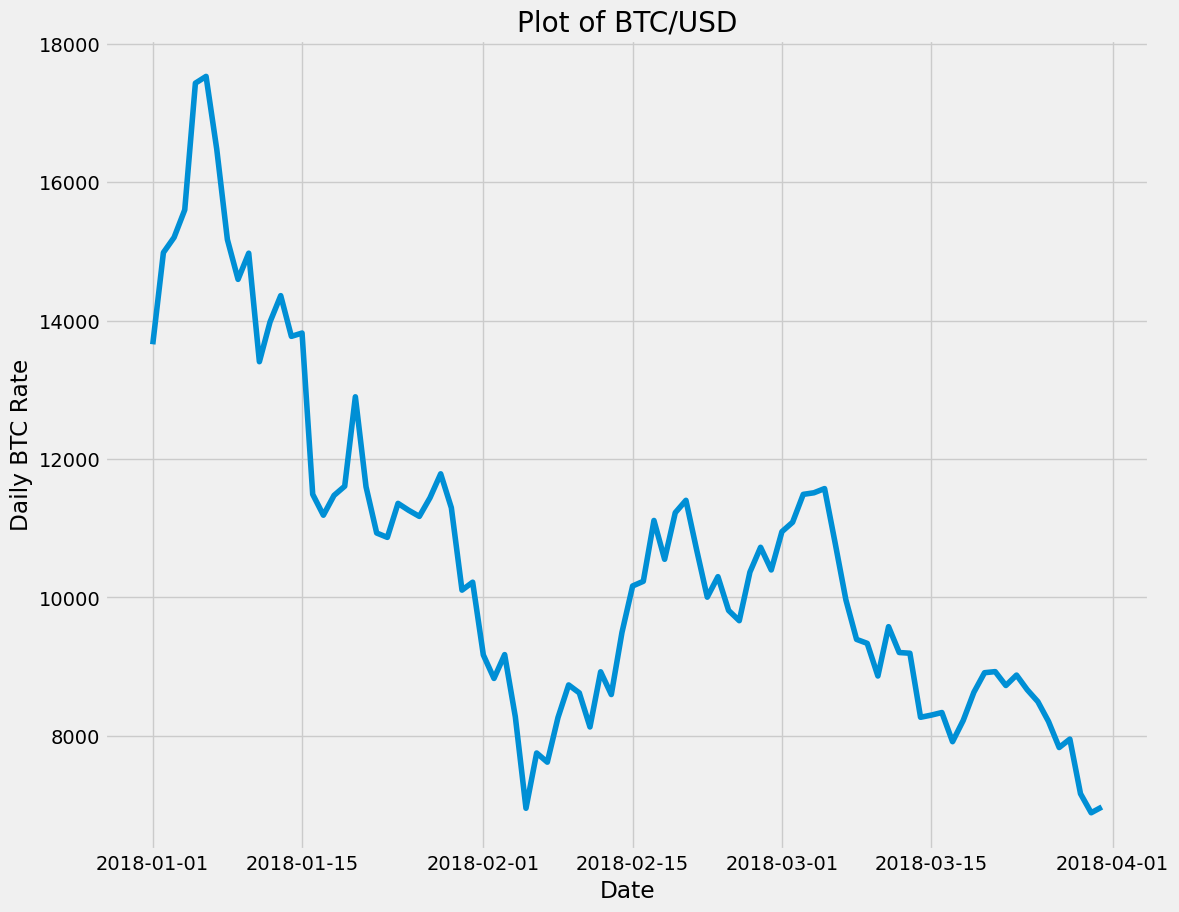

In [18]:
plt.style.use("fivethirtyeight")
 
plt.figure(figsize=(12, 10))
plt.xlabel("Date")
plt.ylabel("Daily BTC Rate")
plt.title("Plot of BTC/USD")
 
plt.plot(single_table["Close"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


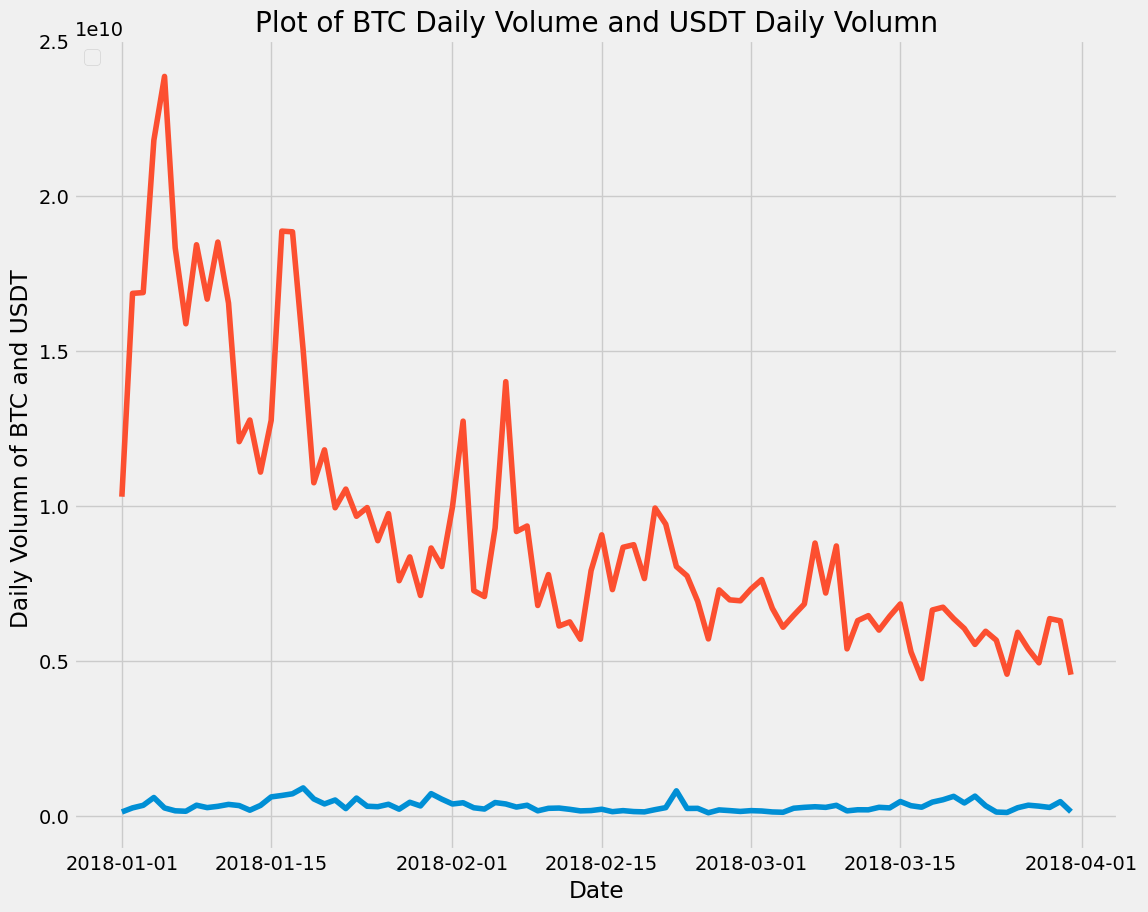

In [19]:
plt.style.use("fivethirtyeight")
 
plt.figure(figsize=(12, 10))
plt.xlabel("Date")
plt.ylabel("Daily Volumn of BTC and USDT ")
plt.title("Plot of BTC Daily Volume and USDT Daily Volumn")
plt.legend(loc="upper left")
plt.plot(single_table[["amount","Volume"]])

In [20]:
df2.head(1)
df3 = df2[["Date","Close"]]
df4 = df2[["Date","Volume"]]

Text(0.5, 1.0, 'BTC Daily Volume')

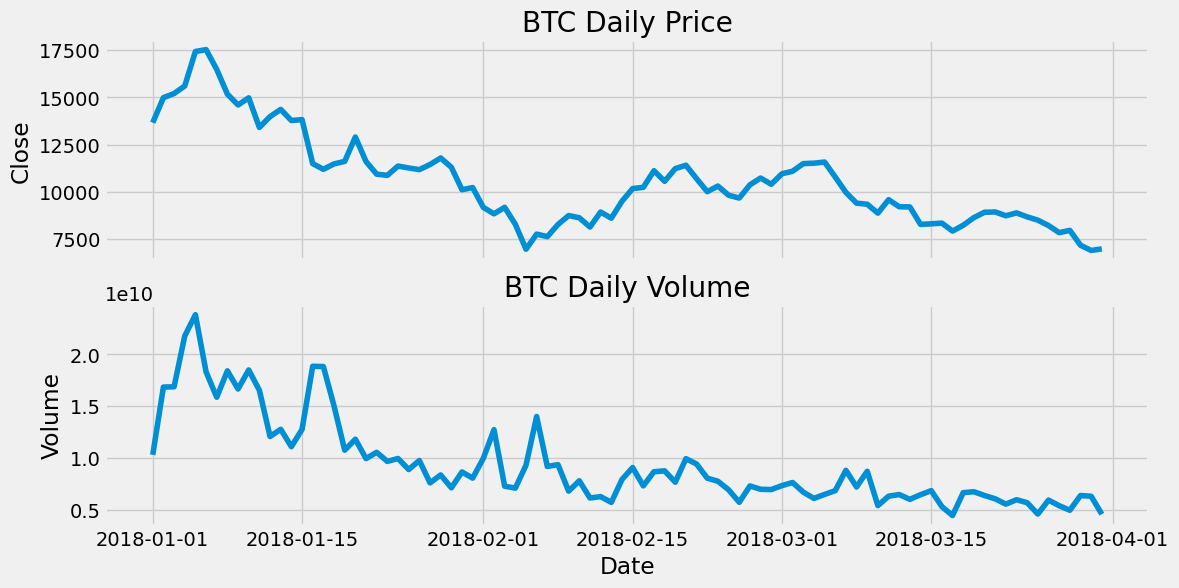

In [21]:
fig,axes = plt.subplots(nrows=2,ncols=1, figsize=(12,6), sharex=True)
sns.lineplot(data=df3, x="Date", y="Close", ax=axes[0])
axes[0].set_title('BTC Daily Price')
sns.lineplot(data=df4, x="Date", y="Volume", ax=axes[1])
axes[1].set_title('BTC Daily Volume')